In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fxpmath import Fxp

In [3]:

#z.resize(True, 16, 8)    # signed=True, n_word=8, n_frac=6


Fs = 100
Ts = 1 /Fs
Tend = 1
N = int(Tend / Ts) + 1
t = np.arange(0, N, 1, dtype=int)
x = np.ones(shape=N,dtype=float)
y = np.zeros(shape=N,dtype=float)
A = Ts
x = Fxp(x, signed=True, n_word=16, n_frac=10)
y = Fxp(y, signed=True, n_word=16, n_frac=10)

y1 = Fxp(y, signed=True, n_word=16, n_frac=10)
A= Fxp(A, signed=True, n_word=16, n_frac=10)
for i in t[0:N-1]:
    y[i+1] = y[i]+ A * x[i]
    y[i+1].resize(True, 16, 10) 
    y1[i+1] = y1[i] + A * y[i]
    y1[i+1].resize(True, 16, 10) 


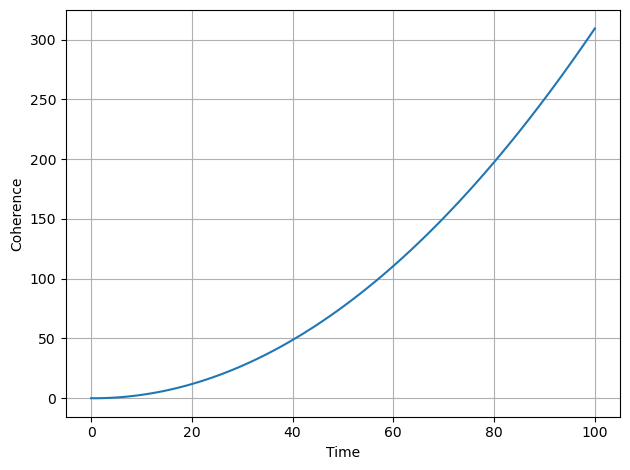

In [4]:

class Gp:

    def __init__(self, b, a):
        self.speed_1 = 0
        self.b = b
        self.a = a
        self.x = np.zeros(len(a))
        self.y = np.zeros(len(b))

    def run(self, x_new):
        # new output
        y_new = np.cumsum(self.b * self.x + self.a * self.y)[-1]

        # Shift vectors
        self.y = np.concatenate((self.y[1:], [y_new]))
        self.y = np.concatenate((self.y[1:], [y_new]))
        self.x = np.concatenate((self.x[1:], [x_new]))
        return y_new



Fs = 100
Ts = 1 /Fs
Tend = 1
N = int(Tend / Ts) + 1
t = np.arange(0, N, 1, dtype=int)


b = np.array([0.0, 0.0, 0.0625])
a = np.array([-1.0, 2.0, 0.0])
Gpx = Gp(b=b, a=a)

volt_in   = np.ones(shape=N,dtype=float)
speed_out = np.zeros(shape=N,dtype=float)

for i in t[0:N-1]:
    speed_out[i+1] = Gpx.run(volt_in[i])

#print(speed_out)

fig, axs = plt.subplots(1, 1)
axs.plot(t, speed_out)
axs.set_xlabel('Time')
axs.set_ylabel('s1 and s2')
axs.grid(True)

axs.set_ylabel('Coherence')

fig.tight_layout()
plt.show()


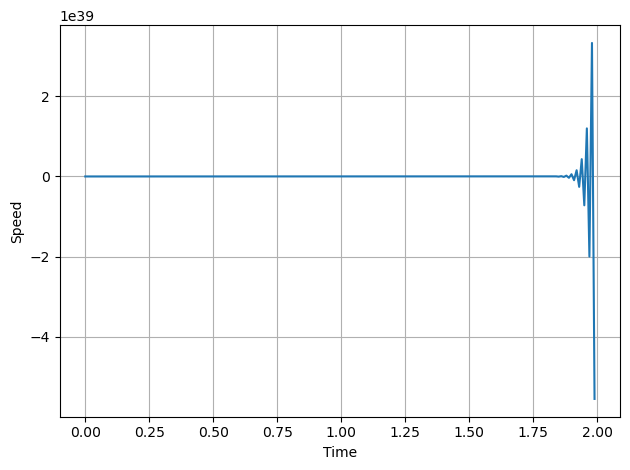

In [72]:
class Gp:

    def __init__(self, b, a):
        self.speed_1 = 0
        self.b = b
        self.a = a
        self.x = np.zeros(len(a))
        self.y = np.zeros(len(b))

    def run(self, x_new):
        # new output
        y_new = np.cumsum(self.b * self.x + self.a * self.y)[-1]

        # Shift vectors
        self.y = np.concatenate((self.y[1:], [y_new]))
        self.y = np.concatenate((self.y[1:], [y_new]))
        self.x = np.concatenate((self.x[1:], [x_new]))
        return y_new



Fs = 100
Ts = 1 /Fs
Tend = 2
N = int(Tend / Ts) + 1
t = np.arange(0, Tend, Ts)
N = len(t)


b = np.array([0.70577, 02.329, 1.0864, 0.0])
a = np.array([-0.07963, 0.49613, -1.4165, 0.0])
Gpx = Gp(b=b, a=a)

volt_in   = np.zeros(shape=N,dtype=float)
volt_in[10:40] = 1.0
speed_out = np.zeros(shape=N,dtype=float)

for i in range(N-1):
    speed_out[i+1] = Gpx.run(volt_in[i])

#print(speed_out)

fig, axs = plt.subplots(1, 1)
axs.plot(t, speed_out)
axs.set_xlabel('Time')
axs.set_ylabel('s1 and s2')
axs.grid(True)

axs.set_ylabel('Speed')

fig.tight_layout()
plt.show()

In [ ]:
x_in = np.array([1,1,1,1,1,1,0,0,0,1,1,1])

a = np.array([1, 0])
b = np.array([0, 0.25])
y = np.array([0, 0])
x = np.array([0, 0])



for i in x_in:
    #c = b * x + a * y
    tmp = np.cumsum(b * x + a * y)[-1]
    print(tmp)
    

    y = np.concatenate((y[1:], [tmp]))
    y = np.concatenate((y[1:], [tmp]))
    x = np.concatenate((x[1:], [i]))
    
